In [1]:
#Import the necessary libraries: pandas, matplotlib, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#load the CSV file
df = pd.read_csv("C:\\Users\\juane\\OneDrive\\Escritorio\\Datos\\housing.csv")

In [5]:
# Display the first few rows of the combined dataset
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [6]:
# Display the last few rows of the combined dataset
df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [7]:
# Display a concise summary of the combined dataset, including the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Generate descriptive statistics for the combined dataset, including count, mean, standard deviation, min, and max values for each column
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [9]:
# Count the number of missing values in each column of the relevant dataset
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
#Check duplicates
duplicates = df.duplicated()
print(f"Total duplicate rows: {duplicates.sum()}")

if duplicates.sum() > 0:
    duplicate_rows = df[df.duplicated()]
    print("Duplicate rows:")
    print(duplicate_rows)

    # Remove duplicates
    df = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicate rows found.")

Total duplicate rows: 0
No duplicate rows found.


In [11]:
# Impute missing values in the 'total_bedrooms' column with the median value
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [12]:
# Count the number of missing values in each column of the relevant dataset
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
# Data Visualization

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=True, color='skyblue')
plt.title('Distribution of Median House Value', fontsize=15)
plt.xlabel('Median House Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, hue='ocean_proximity', palette='viridis', s=100, alpha=0.6, edgecolor='w')
plt.title('Median Income vs Median House Value', fontsize=15)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.legend(title='Ocean Proximity')
plt.grid(True)
plt.show()

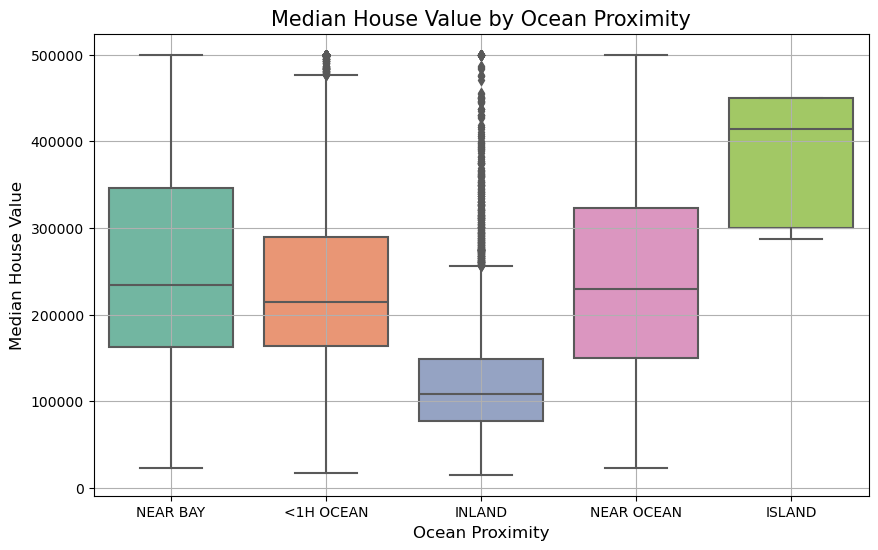

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, palette='Set2')
plt.title('Median House Value by Ocean Proximity', fontsize=15)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.grid(True)
plt.show()

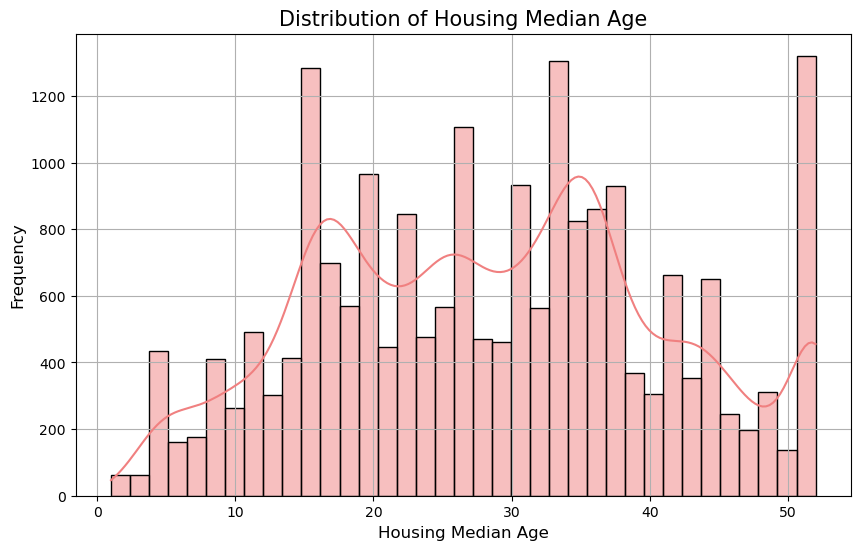

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['housing_median_age'], kde=True, color='lightcoral')
plt.title('Distribution of Housing Median Age', fontsize=15)
plt.xlabel('Housing Median Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_rooms', y='median_house_value', data=df, color='darkcyan', s=100, alpha=0.6, edgecolor='w')
plt.title('Total Rooms vs Median House Value', fontsize=15)
plt.xlabel('Total Rooms', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.grid(True)
plt.show()

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='population', y='median_house_value', data=df, color='darkorange', s=100, alpha=0.6, edgecolor='w')
plt.title('Population vs Median House Value', fontsize=15)
plt.xlabel('Population', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.grid(True)
plt.show()

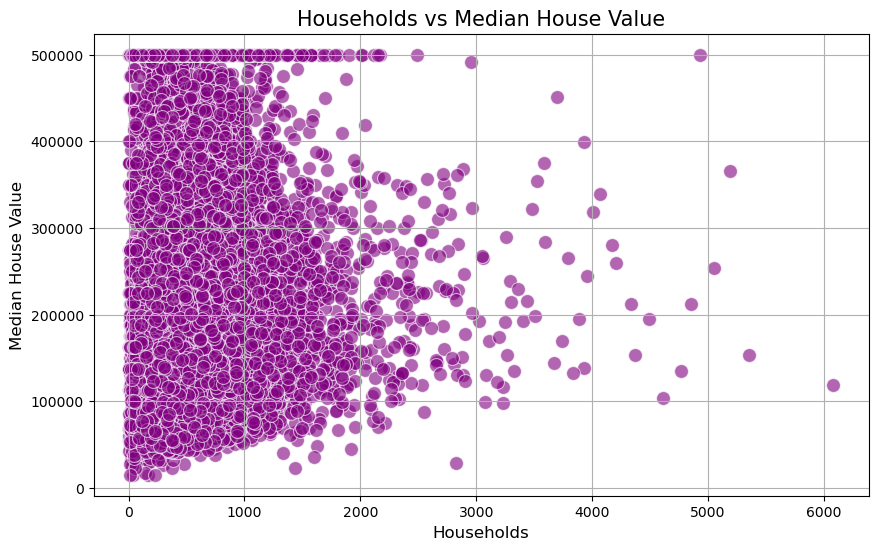

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='households', y='median_house_value', data=df, color='purple', s=100, alpha=0.6, edgecolor='w')
plt.title('Households vs Median House Value', fontsize=15)
plt.xlabel('Households', fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.grid(True)
plt.show()

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['median_income'], kde=True, color='seagreen')
plt.title('Distribution of Median Income', fontsize=15)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [23]:
#ML Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

In [26]:
# Convert ocean_proximity to dummy variables
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [27]:
# Split the data into features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [28]:
# Normalize the numerical variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Models to try
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [31]:
# Train and evaluate the models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2, 'EVS': evs}
    print(f"{name} - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R2: {r2}, EVS: {evs}")

Linear Regression - MSE: 4908476721.156613, MAE: 50670.73824097189, RMSE: 70060.52184473517, R2: 0.6254240620553608, EVS: 0.6255083813734263
Random Forest - MSE: 2404389528.630863, MAE: 31642.75753633721, RMSE: 49034.574828694735, R2: 0.8165160977560968, EVS: 0.81655162789778


In [32]:
# Visualization of Results

In [33]:
# Comparison of MSE
mse_values = [results[model]['MSE'] for model in results]
model_names = list(results.keys())

plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_values, color='skyblue')
plt.title('Model Comparison - Mean Squared Error')
plt.ylabel('MSE')
plt.show()

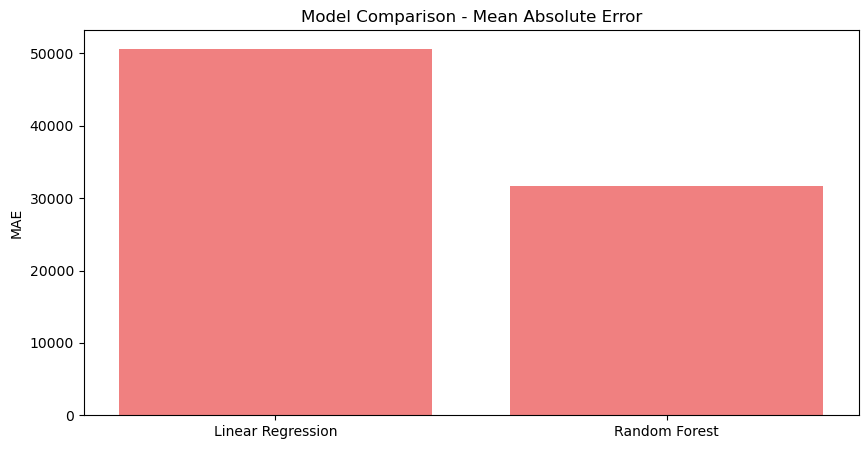

In [34]:
# Comparison of MAE
mae_values = [results[model]['MAE'] for model in results]

plt.figure(figsize=(10, 5))
plt.bar(model_names, mae_values, color='lightcoral')
plt.title('Model Comparison - Mean Absolute Error')
plt.ylabel('MAE')
plt.show()

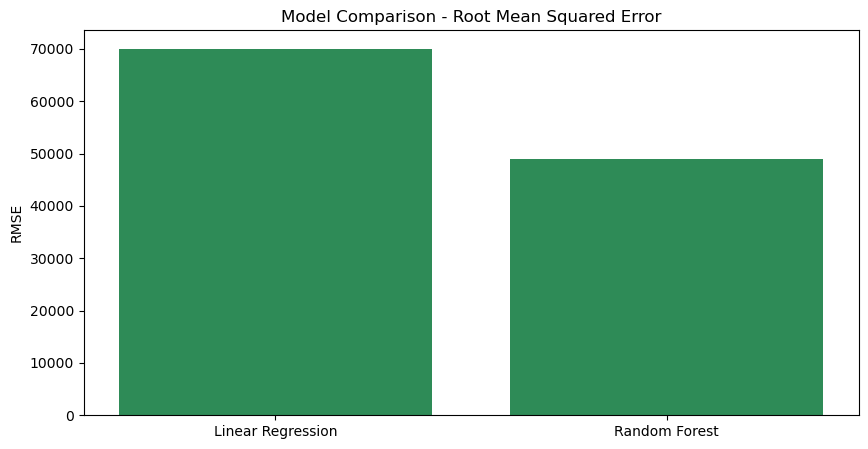

In [35]:
# Comparison of RMSE
rmse_values = [results[model]['RMSE'] for model in results]

plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_values, color='seagreen')
plt.title('Model Comparison - Root Mean Squared Error')
plt.ylabel('RMSE')
plt.show()

In [36]:
# Comparison of R2
r2_values = [results[model]['R2'] for model in results]

plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values, color='lightgreen')
plt.title('Model Comparison - R2 Score')
plt.ylabel('R2')
plt.show()

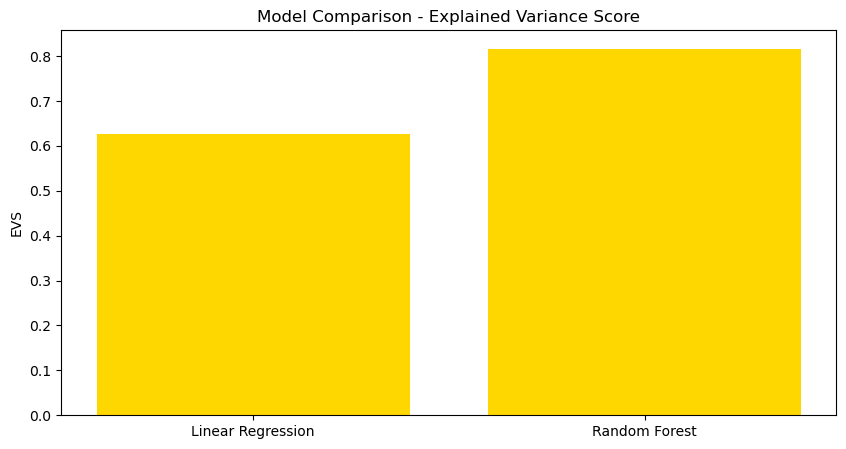

In [37]:
# Comparison of Explained Variance Score
evs_values = [results[model]['EVS'] for model in results]

plt.figure(figsize=(10, 5))
plt.bar(model_names, evs_values, color='gold')
plt.title('Model Comparison - Explained Variance Score')
plt.ylabel('EVS')
plt.show()

In [39]:
# Get feature importances from the Random Forest model
importances = models['Random Forest'].feature_importances_
features = df.drop('median_house_value', axis=1).columns

In [40]:
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [41]:
# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.show()

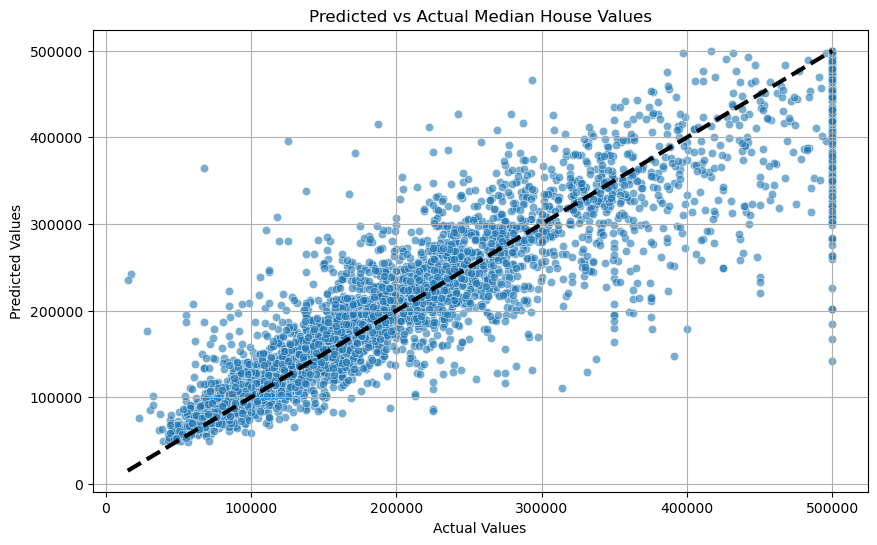

In [42]:
# Predictions from the Random Forest model
y_pred = models['Random Forest'].predict(X_test)

# Plot Predicted vs Actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor='w')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.title('Predicted vs Actual Median House Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

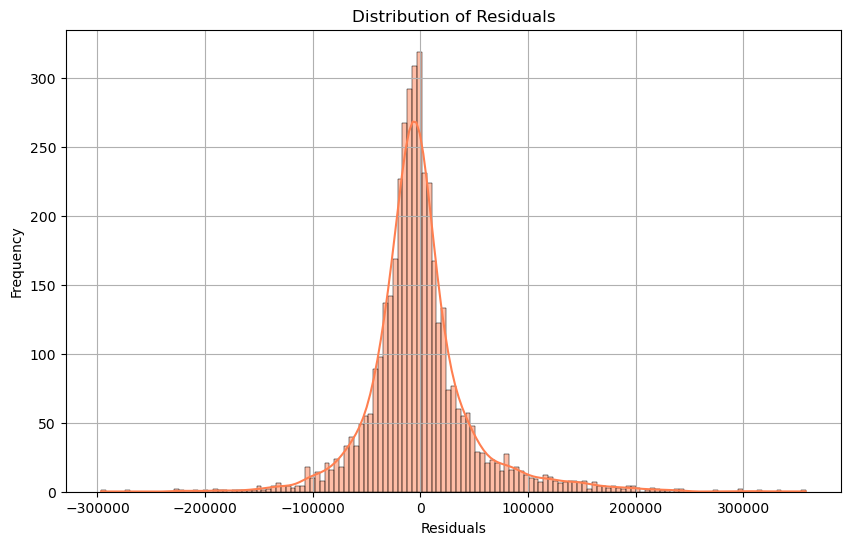

In [43]:
# Residuals from the Random Forest model
residuals = y_test - y_pred

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='coral')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [44]:
#load the CSV file
df2 = pd.read_csv("C:\\Users\\juane\\OneDrive\\Escritorio\\Datos\\house_clas.csv")

In [45]:
# Display the first few rows of the combined dataset
df2.head()

Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms roof  \
0   1          339       6          5            4           6   NO   
1   2          358       5          4            3           4  YES   
2   3          324       7          5            4           5  YES   
3   4          330       6          4            3           5  YES   
4   5          320       7          4            4           5   NO   

   Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expected price Grade  
0           0          76        2   79    6            3481     D  
1          71          96        3   72    4            3510     D  
2         101         117        5   64    3            3748     C  
3         101          82        2   59    2            3134     D  
4           0          75        3   40    1            3843     D

In [46]:
# Display the last few rows of the combined dataset
df2.tail()

Id  Area(total)  Trooms  Nbedrooms  Nbwashrooms  Twashrooms roof  \
2995  2996          341       9          6            5           7  YES   
2996  2997          292       9          8            7           8  YES   
2997  2998          328       7          4            3           5   NO   
2998  2999          293       9          7            7           8   NO   
2999  3000          343       7          6            6           8   NO   

      Roof(Area)  Lawn(Area)  Nfloors  API  ANB  Expected price Grade  
2995          95         115        5   90    2            4246     B  
2996         116          87        7   97    4            3753     A  
2997           0          78        5   95    6            3607     D  
2998           0          78        7   51    3            4198     B  
2999           0         108        5   95    3            4105     C

In [49]:
# Display a concise summary of the combined dataset, including the data types and non-null values for each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.3+ KB


In [50]:
# Generate descriptive statistics for the combined dataset, including count, mean, standard deviation, min, and max values for each column
df2.describe()

Id  Area(total)       Trooms    Nbedrooms  Nbwashrooms  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean   1500.500000   325.117000     7.021667     5.023000     4.513667   
std     866.169729    20.507742     1.421221     1.634838     1.715263   
min       1.000000   290.000000     5.000000     2.000000     1.000000   
25%     750.750000   308.000000     6.000000     4.000000     3.000000   
50%    1500.500000   325.000000     7.000000     5.000000     4.000000   
75%    2250.250000   343.000000     8.000000     6.000000     6.000000   
max    3000.000000   360.000000     9.000000     8.000000     8.000000   

        Twashrooms   Roof(Area)   Lawn(Area)      Nfloors          API  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      6.010667    48.980667    95.609333     4.013333    70.190667   
std       1.786136    48.746641    14.837388     1.621532    17.563460   
min       2.000000     0.000000    70.000000     1.000000    40.000000   
25%       5.000000     0.000000    83.000000     3.000000    55.000000   
50%       6.000000    71.000000    96.000000     4.000000    70.000000   
75%       7.000000    96.000000   109.000000     5.000000    85.000000   
max      10.000000   120.000000   120.000000     7.000000   100.000000   

              ANB  Expected price  
count  3000.00000     3000.000000  
mean      3.47900     3782.938333  
std       1.69426      567.189995  
min       1.00000     2504.000000  
25%       2.00000     3354.000000  
50%       4.00000     3771.000000  
75%       5.00000     4208.000000  
max       6.00000     5216.000000

In [51]:
# Count the number of missing values in each column of the relevant dataset
df2.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

In [52]:
#Check duplicates
duplicates2 = df2.duplicated()
print(f"Total duplicate rows: {duplicates2.sum()}")

if duplicates2.sum() > 0:
    duplicate_rows = df2[df2.duplicated()]
    print("Duplicate rows:")
    print(duplicate_rows)

    # Remove duplicates
    df2 = df2.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicate rows found.")

Total duplicate rows: 0
No duplicate rows found.


In [53]:
# Data Visualization

In [54]:
sns.set(style="whitegrid")

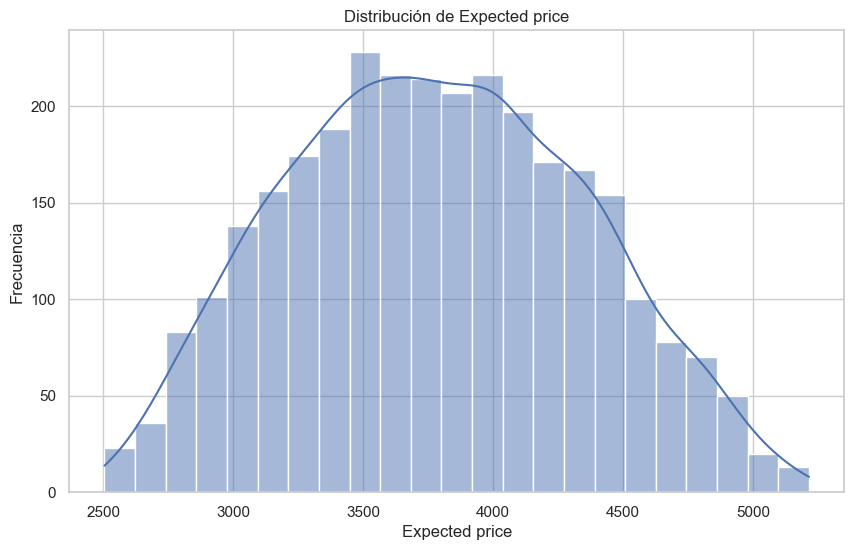

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['Expected price'], kde=True)
plt.title('Distribución de Expected price')
plt.xlabel('Expected price')
plt.ylabel('Frecuencia')
plt.show()

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area(total)', y='Expected price', data=df2)
plt.title('Relación entre Area(total) y Expected price')
plt.xlabel('Area(total)')
plt.ylabel('Expected price')
plt.show()

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grade', y='Expected price', data=df2)
plt.title('Expected price por Grade')
plt.xlabel('Grade')
plt.ylabel('Expected price')
plt.show()

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Grade', data=df2)
plt.title('Número de casas por Grade')
plt.xlabel('Grade')
plt.ylabel('Frecuencia')
plt.show()

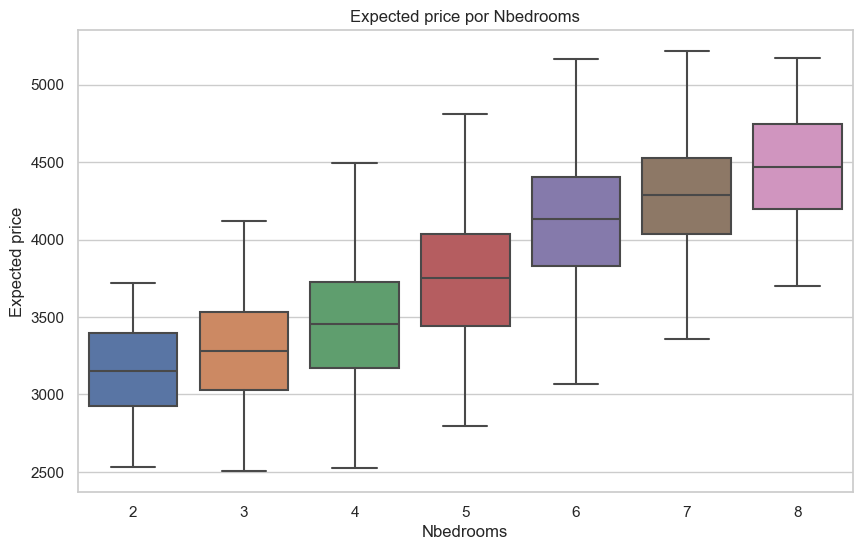

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nbedrooms', y='Expected price', data=df2)
plt.title('Expected price por Nbedrooms')
plt.xlabel('Nbedrooms')
plt.ylabel('Expected price')
plt.show()

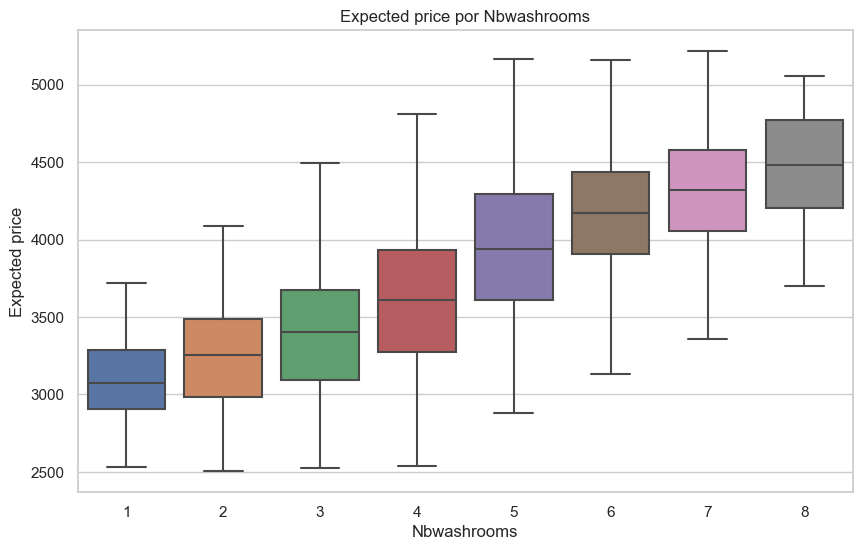

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nbwashrooms', y='Expected price', data=df2)
plt.title('Expected price por Nbwashrooms')
plt.xlabel('Nbwashrooms')
plt.ylabel('Expected price')
plt.show()

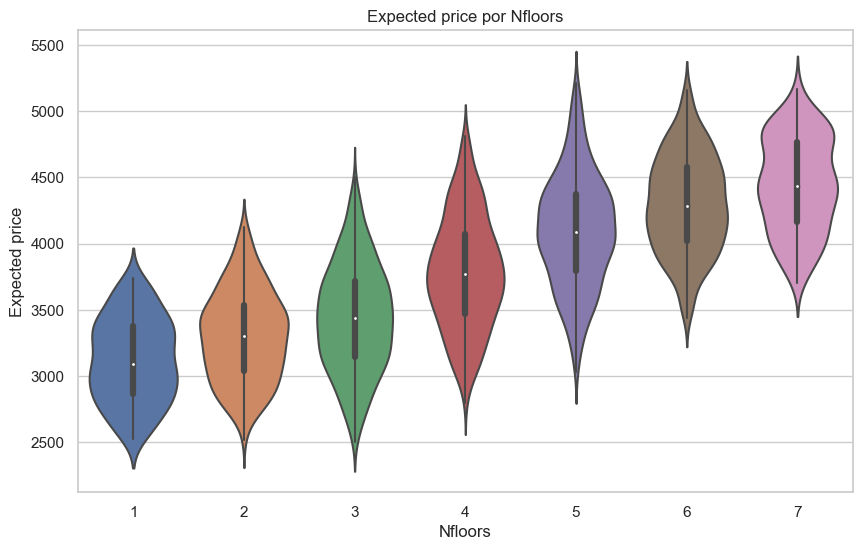

In [62]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Nfloors', y='Expected price', data=df2)
plt.title('Expected price por Nfloors')
plt.xlabel('Nfloors')
plt.ylabel('Expected price')
plt.show()

In [67]:
#ML Class

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [82]:
# Convertir variables categóricas a numéricas
le = LabelEncoder()
df2['roof'] = le.fit_transform(df2['roof'])
df2['Grade'] = le.fit_transform(df2['Grade'])

In [83]:
# Separar características y etiqueta
X = df2.drop(['Id', 'Grade'], axis=1)
y = df2['Grade']

In [84]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [86]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classifier")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        87
           1       0.85      0.86      0.85       106
           2       0.85      0.90      0.88       125
           3       0.95      0.97      0.96       272
           4       1.00      0.30      0.46        10

    accuracy                           0.91       600
   macro avg       0.92      0.78      0.81       600
weighted avg       0.91      0.91      0.91       600

[[ 77  10   0   0   0]
 [  5  91  10   0   0]
 [  0   6 112   7   0]
 [  0   0   9 263   0]
 [  0   0   0   7   3]]


In [87]:
# Support Vector Machine
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print("Support Vector Machine")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

Support Vector Machine
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        87
           1       0.93      0.96      0.94       106
           2       0.94      0.94      0.94       125
           3       0.98      0.98      0.98       272
           4       0.89      0.80      0.84        10

    accuracy                           0.96       600
   macro avg       0.95      0.93      0.94       600
weighted avg       0.96      0.96      0.96       600

[[ 84   3   0   0   0]
 [  1 102   3   0   0]
 [  0   5 117   3   0]
 [  0   0   4 267   1]
 [  0   0   0   2   8]]


In [88]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        87
           1       0.91      0.95      0.93       106
           2       0.94      0.93      0.94       125
           3       0.97      0.99      0.98       272
           4       1.00      0.60      0.75        10

    accuracy                           0.96       600
   macro avg       0.96      0.88      0.91       600
weighted avg       0.96      0.96      0.96       600

[[ 83   4   0   0   0]
 [  2 101   3   0   0]
 [  0   6 116   3   0]
 [  0   0   4 268   0]
 [  0   0   0   4   6]]


In [89]:
#Explanation of Results

In [90]:
#The Random Forest Classifier has a good overall accuracy of 91%. 
#However, its recall for class 4 is quite low, indicating that it misses many instances of this class. 
#This is reflected in the confusion matrix where class 4 has only 3 correct predictions out of 10.

In [91]:
#The SVM performs very well with an accuracy of 96%. 
#It has high precision and recall across all classes, indicating that it correctly identifies and classifies most instances. 
#The confusion matrix shows very few misclassifications.

In [92]:
#Logistic Regression also performs well with an accuracy of 96%. 
#It has slightly lower recall compared to SVM, especially for class 4, but overall, it provides a balanced performance across all metrics.

In [93]:
#Visualizing the Results

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay

In [95]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title(title)
    plt.show()

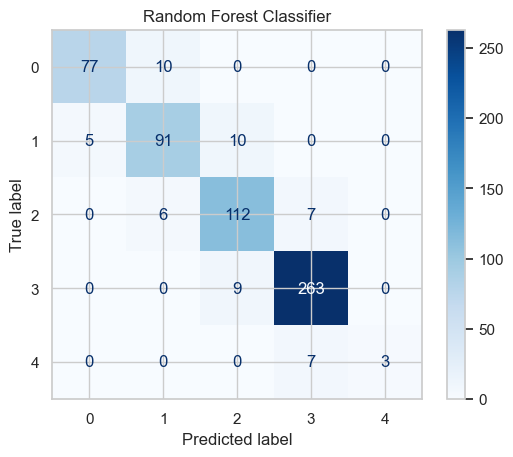

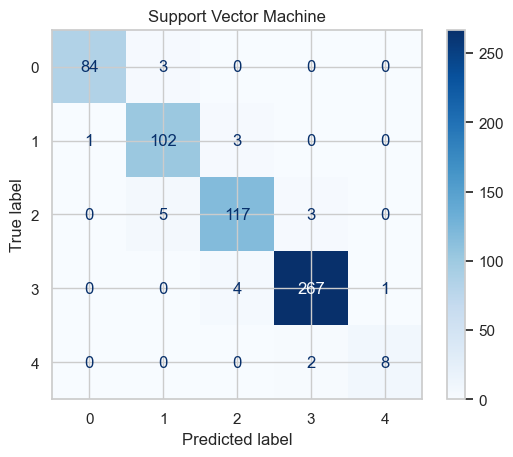

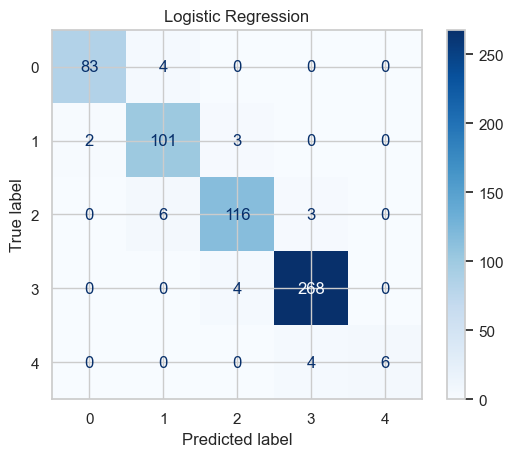

In [96]:
# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Classifier")
plot_confusion_matrix(y_test, y_pred_svc, "Support Vector Machine")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

In [97]:
# Plotting the classification report metrics
import numpy as np

# Extracting metrics
metrics = ['precision', 'recall', 'f1-score']
models = ['Random Forest', 'SVM', 'Logistic Regression']
scores = {
    'Random Forest': [0.92, 0.78, 0.81],
    'SVM': [0.95, 0.93, 0.94],
    'Logistic Regression': [0.96, 0.88, 0.91]
}

# Creating a DataFrame for plotting
df_scores = pd.DataFrame(scores, index=metrics)

# Plotting the metrics
df_scores.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.show()

In [98]:
#Scatter Plot: Predictions vs. Actual Values

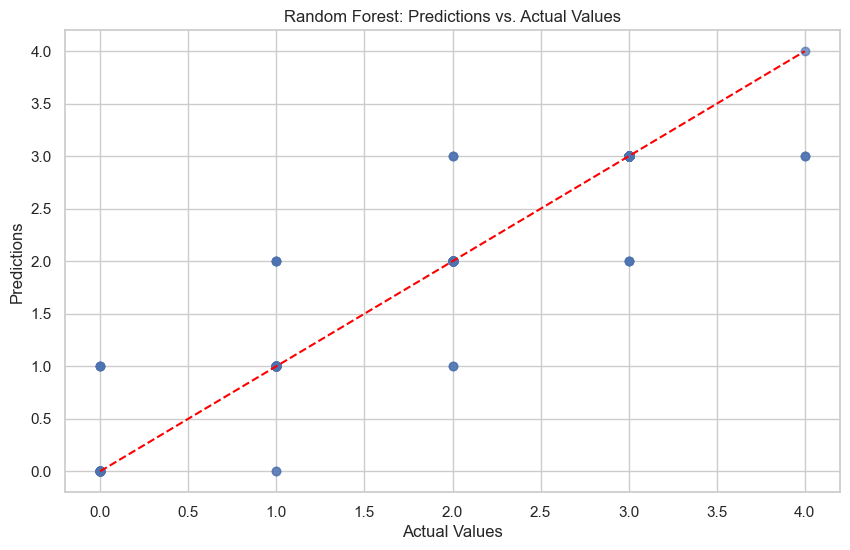

In [99]:
# Scatter plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Random Forest: Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

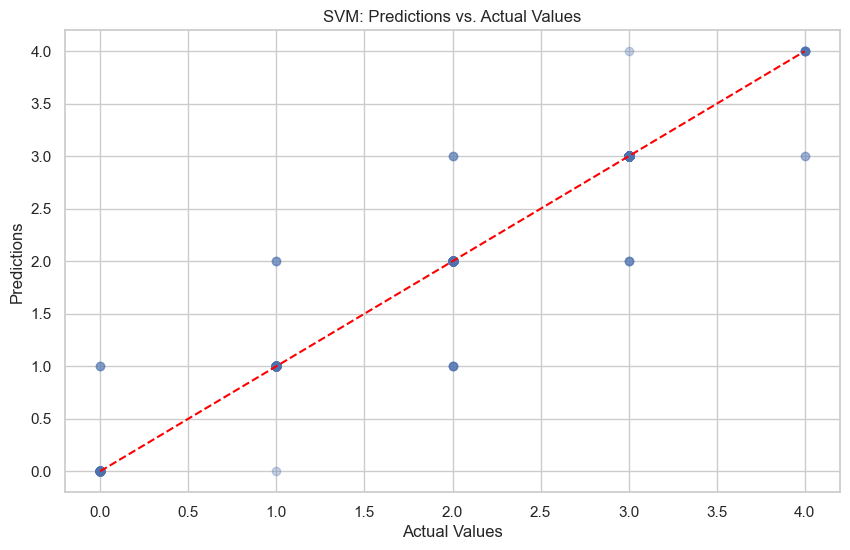

In [100]:
# Scatter plot for SVM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svc, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('SVM: Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

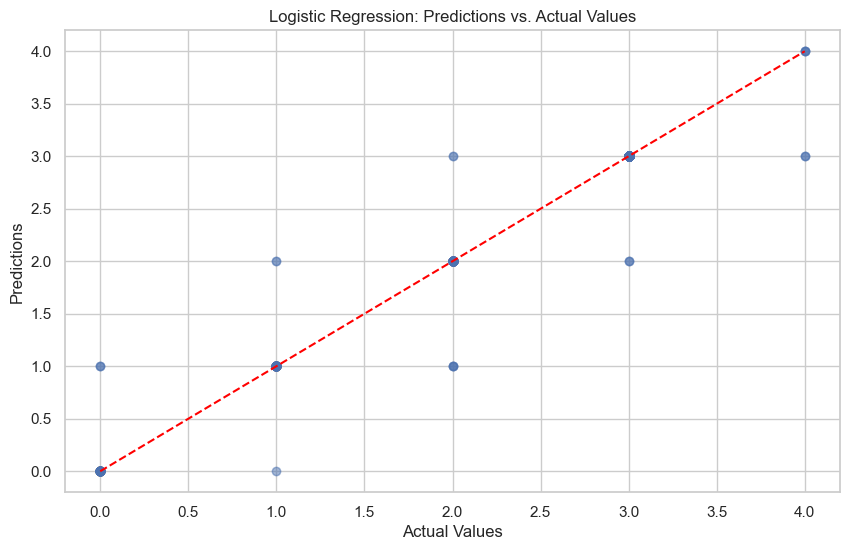

In [101]:
# Scatter plot for Logistic Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Logistic Regression: Predictions vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.show()

In [102]:
#Residual Plot: Differences between Predictions and Actual Values

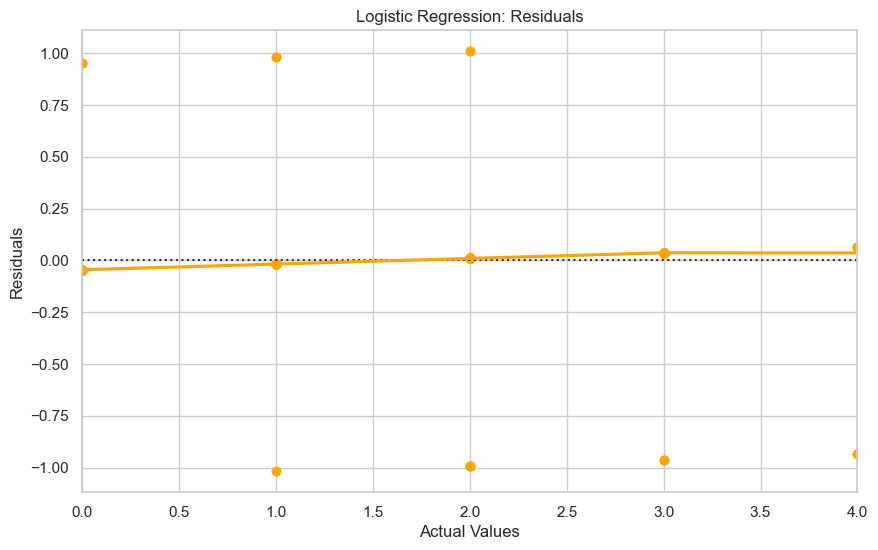

In [103]:
# Residual plot for Random Forest
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred_rf, lowess=True, color='blue')
plt.title('Random Forest: Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

# Residual plot for SVM
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred_svc, lowess=True, color='green')
plt.title('SVM: Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

# Residual plot for Logistic Regression
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred_lr, lowess=True, color='orange')
plt.title('Logistic Regression: Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [104]:
#Explanation of the Plots

In [105]:
#Scatter Plot: These plots show the relationship between the actual values and the predicted values. 
#Ideally, the points should lie on the red diagonal line, indicating perfect predictions. 
#The closer the points are to this line, the better the model’s performance.

In [106]:
#Residual Plot: These plots show the residuals (differences between actual and predicted values). 
#Ideally, the residuals should be randomly distributed around zero, indicating that the model’s predictions are unbiased.